## Week 3 classification

This week covers classification using scikit learn to predict customers that will churn.

### 3.1 and 3.2 Load, Examine and Prepare the data

In [2]:
## Load the libararies needed
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
## Download the data
#!wget -O customer_churn.csv 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [3]:
## Read the data and visualised the top rows
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## Transpose and visualised the top rows
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
## make all column names the same format
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
## Make all values the same format (only strings values)
string_var = list(df.dtypes[df.dtypes == 'object'].index)
for var in string_var:
    df[var] = df[var].str.lower().str.replace(' ', '_')

In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
## Reformat from string object to number
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)


In [9]:
## Change the churn values from yes/no to 1/2
df.churn = (df.churn == 'yes').astype(int)

### 3.3 Setting up the validation framework

- Set up the validation framework using scikit learn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
len(df_train), len(df_test), len(df_val), len(df)

(4225, 1409, 1409, 7043)

In [14]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [15]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [16]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

In [17]:
df_train.head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


### 3.4 EDA

- Examine missing values and fix them
- Explore the churn values to determine factors (variable, customer characteristics) that will make a customer churn
- Further examine the numerical and categorical variable

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
## No missing values, aleady fix in the last section
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
## Check the number of chrun 
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [21]:
## Check the number of chrun in percentage
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [22]:
## Get the mean for churn rate (global)
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [23]:
numeric = ['tenure', 'monthlycharges','totalcharges' ]

In [24]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [25]:
## NUmber of unique values for the catergorical variables 
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature Importance: Churn Rate and Risk Ratio

- Check which features have the most effect on the churn
- Who is most likely to churn
  - Churn rate
  - Risk ratio
  - Mutual information


This is only applicable to categorical variables

#### Churn rate

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [27]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female, churn_male, global_churn_rate

(0.27682403433476394, 0.2632135306553911, 0.26996805111821087)

In [28]:
## Female rate
global_churn_rate - churn_female

-0.006855983216553063

In [29]:
## Male rate
global_churn_rate - churn_male

0.006754520462819769

In [30]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()

churn_partner, churn_no_partner

(0.20503330866025166, 0.3298090040927694)

In [31]:
## Partner 
global_churn_rate - churn_partner

0.06493474245795922

In [32]:
## no partner
global_churn_rate - churn_no_partner

-0.05984095297455855

#### Risk ration

In [33]:
## no partner ratio
churn_no_partner / global_churn_rate

1.2216593879412643

In [34]:
## partner ratio
churn_partner / global_churn_rate

0.7594724924338315

In [35]:
## get churn for all values
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [36]:
from IPython.display import display

In [37]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### 3.6 Feature Importance: Mutual information

In [38]:
from sklearn.metrics import mutual_info_score

In [39]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [40]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [41]:
mutual_info_score(df_full_train['churn'], df_full_train.partner)

0.009967689095399745

In [42]:
for v in categorical:
    print(v, round(mutual_info_score(df_full_train[v], df_full_train.churn), 6))

gender 0.000117
seniorcitizen 0.00941
partner 0.009968
dependents 0.012346
phoneservice 0.000229
multiplelines 0.000857
internetservice 0.055868
onlinesecurity 0.063085
onlinebackup 0.046923
deviceprotection 0.043453
techsupport 0.061032
streamingtv 0.031853
streamingmovies 0.031581
contract 0.09832
paperlessbilling 0.017589
paymentmethod 0.04321


In [43]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [44]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 3.7 Feature importance: Correlation

Correlation  between numerical variables
- dependacy between churn and numerical variable 

#### corelation between numerical values and churn rate

In [45]:
df_full_train[numeric].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [46]:
df_full_train[numeric].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

#### Tenure vs churn

In [47]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [48]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [49]:
df_full_train[(df_full_train.tenure >= 2) & (df_full_train.tenure <= 12)].churn.mean()

0.41798107255520506

In [50]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

#### Tenure vs monthly charges

In [51]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [52]:
df_full_train[(df_full_train.monthlycharges >20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [53]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

### 3.8 one-hot encoding

- Using scikit-Learn to encode categorial features

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
train_dicts = df_train[categorical + numeric].to_dict(orient='records')

In [56]:
dv = DictVectorizer(sparse=False)

In [57]:
X_train = dv.fit_transform(train_dicts)

In [58]:
val_dicts = df_val[categorical + numeric].to_dict(orient='records')

In [59]:
X_val = dv.transform(val_dicts)

### 3.9 Logistic regresion
- Binary classification
- Linear vs logistic regression

In [60]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [61]:
z = np.linspace(-7,7,51)

In [62]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

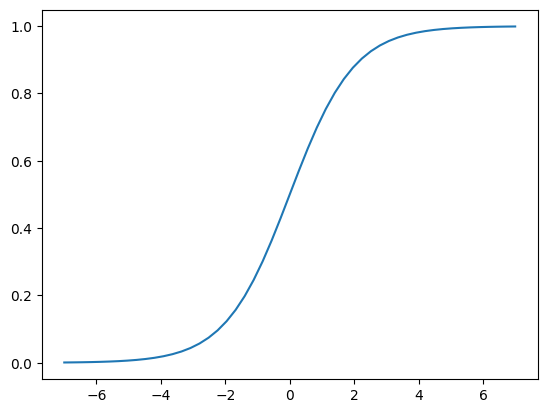

In [63]:
plt.plot(z, sigmoid(z))

In [64]:
def linear_regression(xi):
    result = w0

    for i in range(len(xi)):
        result = result + xi[i] * w[i]

    return result

In [65]:
def logistic_regression(xi):
    score = w0

    for i in range(len(xi)):
        result = result + xi[i] * w[i]

    result = sigmoid(score)
    return result

## 3.10 Training Logistic Regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [66]:
from sklearn.linear_model import LogisticRegression
 
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/saikouybah/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
model.coef_

array([[ 4.75155991e-01, -1.74975282e-01, -4.07621179e-01,
        -2.93614507e-02, -7.80790205e-02,  6.25846436e-02,
        -8.85093865e-02, -8.15157283e-02, -3.42265262e-02,
        -7.32139450e-02, -3.35590512e-01,  3.16659428e-01,
        -8.85093865e-02,  3.67425808e-03, -2.57869569e-01,
         1.41378927e-01,  9.05017037e-03,  6.24377705e-02,
        -8.85093865e-02, -8.13688552e-02,  2.65669181e-01,
        -8.85093865e-02, -2.84600265e-01, -2.31116338e-01,
         1.23675867e-01, -1.65755891e-01,  5.83154200e-02,
        -8.70582215e-02, -3.20897539e-02,  7.05966274e-02,
        -5.88891231e-02,  1.41378927e-01, -2.48819399e-01,
         2.15610681e-01, -1.20597767e-01, -8.85093865e-02,
         1.01666683e-01, -7.10961671e-02, -8.85093865e-02,
         5.21650825e-02,  2.13459834e-01, -8.85093865e-02,
        -2.32390919e-01, -7.05773495e-02,  3.83867269e-04]])

In [95]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.029, -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.062, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [96]:
model.intercept_

array([-0.10879596])

In [97]:
model.intercept_[0]

-0.10879596247305912

In [98]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [99]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00894982, 0.20532809, 0.21311907, ..., 0.13630158, 0.80003335,
       0.83763101])

In [103]:
churn_decision = y_pred >0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [102]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [104]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [75]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [76]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [105]:
(y_val == churn_decision).mean()

0.8026969481902059

In [78]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008950,0,0,True
1,0.205328,0,0,True
2,0.213119,0,0,True
3,0.543409,1,1,True
4,0.214631,0,0,True
...,...,...,...,...
1404,0.312919,0,0,True
1405,0.039208,0,1,False
1406,0.136302,0,0,True
1407,0.800033,1,1,True


In [79]:
df_pred.correct.mean()

0.8026969481902059

In [106]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 - Model Interpretation
- Look at the coefficients
- Train a smaller model  with fewer features

In [80]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [81]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.029, -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.062, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [82]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', 0.475),
 ('contract=one_year', -0.175),
 ('contract=two_year', -0.408),
 ('dependents=no', -0.029),
 ('dependents=yes', -0.078),
 ('deviceprotection=no', 0.063),
 ('deviceprotection=no_internet_service', -0.089),
 ('deviceprotection=yes', -0.082),
 ('gender=female', -0.034),
 ('gender=male', -0.073),
 ('internetservice=dsl', -0.336),
 ('internetservice=fiber_optic', 0.317),
 ('internetservice=no', -0.089),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.258),
 ('multiplelines=no_phone_service', 0.141),
 ('multiplelines=yes', 0.009),
 ('onlinebackup=no', 0.062),
 ('onlinebackup=no_internet_service', -0.089),
 ('onlinebackup=yes', -0.081),
 ('onlinesecurity=no', 0.266),
 ('onlinesecurity=no_internet_service', -0.089),
 ('onlinesecurity=yes', -0.285),
 ('paperlessbilling=no', -0.231),
 ('paperlessbilling=yes', 0.124),
 ('partner=no', -0.166),
 ('partner=yes', 0.058),
 ('paymentmethod=bank_transfer_(automatic)', -0.087),
 ('paymentmethod=credit_card_(autom

In [83]:
small = ['contract', 'tenure', 'monthlycharges']
 
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [84]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [85]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')
 
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [86]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [87]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)
 
w0 = model_small.intercept_[0]
w0

-2.477957595811191

In [88]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [89]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [90]:
sigmoid(-2.47)

0.07798823512936635

In [91]:
sigmoid(-2.47+0.97)

0.18242552380635632

In [92]:
sigmoid(-2.47 + 0.97 + 50*0.027)

0.46257015465625034

In [93]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

0.41824062315816374

In [112]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [113]:
sigmoid(_)

0.41824062315816374